# E08 : Regression analysis

This weeks homework asks you to perform a **linear regression analysis** on actual data. The aim is investigate whether a linear relationship between the independent and the dependent variable exists. 

The data-set contains cricket chirps (dependent variable) versus temperature (independent variable). The chrip rate is measured in chirps/sec for the [striped ground cricket](http://songsofinsects.com/crickets/striped-ground-cricket) at a given temperature which is provided in degrees celisus. The data is taken from [The Song of Insects by Dr.G.W. Pierce, Harvard College Press](https://www.hup.harvard.edu/catalog.php?isbn=9780674420663) .

The data is given below in the cricketData `numpy` array. Note that the *first column contains the chirps/sec* and the *second column contains the temperature* in celsius. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cricketData = np.array(([20.         ,31.44444359],
 [16.         ,21.99999915],
 [19.79999924 ,34.05555725],
 [18.39999962 ,29.05555725],
 [17.10000038 ,26.99999915],
 [15.5        ,23.99999831],
 [14.69999981 ,20.94444275],
 [17.10000038 ,27.77777778],
 [15.39999962 ,20.77777863],
 [16.20000076 ,28.50000169],
 [15.         ,26.44444359],
 [17.20000076 ,28.11111026],
 [16.         ,26.99999915],
 [17.         ,28.61111111],
 [14.39999962 ,24.61111281]))

Text(0, 0.5, 'chirp/sec')

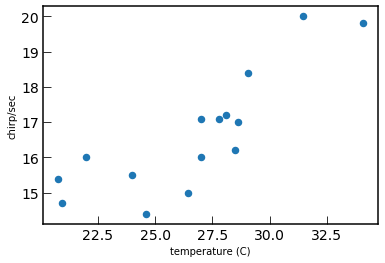

In [5]:
plt.plot(cricketData[:,1],cricketData[:,0],'o')
plt.xlabel('temperature (C)')
plt.ylabel('chirp/sec')

Here are the specific questions related to this data-set : 

1. Perform a linear regression analysis on the cricket chirp data-set. Treat the temperature as independent variable and the chirp rate (in chrips/sec) as dependent variable. Remember from the course that the dependent variable is the one which you aim to predict based on changes in the independent variable. Check out the [tutorial T6 - Regression analysis](https://github.com/mgraupe/DataSciPy2020/blob/master/tutorials/T06_Regression-analysis.ipynb) for two ways of how a linear regression analysis can be performed. 

In [4]:
# your code goes here 
from scipy.stats import linregress

linregressCricket = linregress(cricketData[:,1],cricketData[:,0])
print(linregressCricket)

LinregressResult(slope=0.3814649611357892, intercept=6.472457405198028, rvalue=0.8351437870409351, pvalue=0.00010667185495712752, stderr=0.06968020671217373)


2. Plot the cricket-data together with the regression line obtained from the linear regression analysis. 

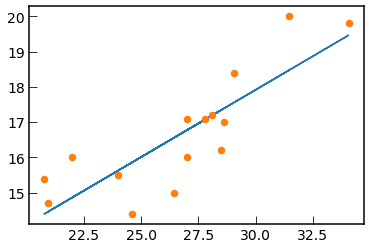

In [26]:
# your code goes here 
# the weights of the linear regression are stored in the first and second element of the return from linregress
# the first element is the slope, the second one the intercept with y axishttps://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
yPredict = linregressCricket[0]*cricketData[:,1] + linregressCricket[1]

plt.plot(cricketData[:,1],yPredict)
plt.plot(cricketData[:,1],cricketData[:,0],'o')

plt.xlabel('temperature (C)')
plt.ylabel('chirp/sec')

3. What is the R squared value obtaind through the linear regression analysis on the cricket data? 

In [27]:
# your code goes here
print('The R squared values of the linear regression is : ',linregressCricket[2]**2)

The R squared values of the linear regression is :  0.6974651450330747


4. Now perform regression analysis with a 2nd order polynomial. What is the R squared value obtaind with this more flexible function?

In [59]:
coeffs2 = np.polyfit(cricketData[:,1],cricketData[:,0],2)
yPredict2= np.polyval(coeffs2,cricketData[:,1])

SStot = np.sum((cricketData[:,0] - np.mean(cricketData[:,0]))**2)
SSres = np.sum((cricketData[:,0] - yPredict2)**2)
Rsquared2 = 1 - SSres/SStot
print('The R squared value for the third order polynomial fit is :',Rsquared2)

The R squared value for the third order polynomial fit is : 0.7789250279965688


5. Using the regression model from the linear- and the second order polynomial regression analysis make a prediction of the cricket behavior for a temperature which is outside the range of measured values. Specifically, which rate of chirps would both regression models predict for  40 °C? Which of the two predictions do you trust more and why?  

In [60]:
# your code goes here
temp = 40
yPredict40 = linregressCricket[0]*temp + linregressCricket[1]
print('Based on linear regression, one would predict ',np.round(yPredict40,2),' chirps/sec at',temp,' degrees celsius.')


yPredict3_40 = np.polyval(coeffs2,temp)
print('Based on third order polynomial regression, one would predict ',np.round(yPredict3_40,2),' chirps/sec at',temp,' degrees celsius.')


Based on linear regression, one would predict  21.73  chirps/sec at 40  degrees celsius.
Based on third order polynomial regression, one would predict  26.51  chirps/sec at 40  degrees celsius.


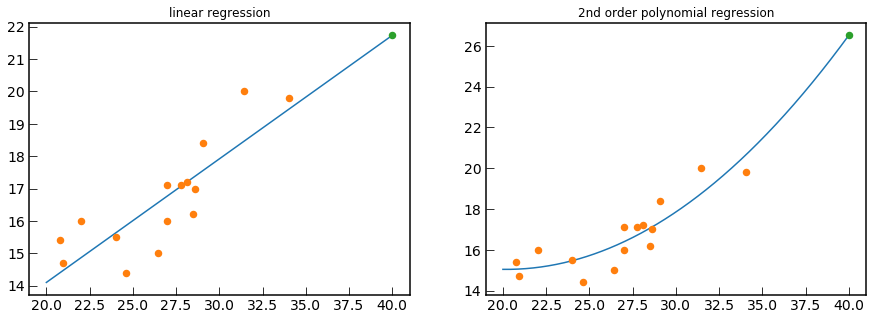

In [61]:
x = np.linspace(20,40,1000)
yPredict = linregressCricket[0]*x + linregressCricket[1]
fig = plt.figure(figsize=(15,5))

ax0 = fig.add_subplot(1,2,1)
ax0.set_title('linear regression')
ax0.plot(x,yPredict)
ax0.plot(cricketData[:,1],cricketData[:,0],'o')
ax0.plot(temp,yPredict40,'o')
ax0.set_xlabel('temperature (C)')
ax0.set_ylabel('chirp/sec')

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('2nd order polynomial regression')
ax1.plot(x,np.polyval(coeffs3,x))
ax1.plot(cricketData[:,1],cricketData[:,0],'o')
ax1.plot(temp,np.polyval(coeffs3,temp),'o')
ax1.set_xlabel('temperature (C)')
ax1.set_ylabel('chirp/sec')

plt.show()

There are too few data-points to be certain about the shape of the relationship between temperature and chirp/sec. It appears though that the relationship is quadratic rather than linear, which is also supported by the higher R-squared for 2nd order polynomial regression. In this case, the prediction from the quadradic fit might be more realistic. 